In [1]:
import os
# import Google Drive 套件
from google.colab import drive
# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')

os.chdir('./gdrive/MyDrive/Colab Notebooks/deep_learning/hw2')      # 檔案目錄

Mounted at /content/gdrive


In [2]:
import numpy as np
import cv2
import functions as fc
import perception as mc
import importlib
import pandas as pd
import random
import pickle
import time
import matplotlib.pyplot as plt

In [ ]:
# with open('./model/accu.pickle', 'rb') as f:
#   accu_dict = pickle.load(f)
# with open('./model/accu.pickle', 'rb') as f:
#   b = pickle.load(f)

In [ ]:
# with open('./model/accu.pickle', 'wb') as f:
#   pickle.dump(a, f)

In [ ]:
# for i, j in b.items():
#   a[i] = a[i] + b[i]

In [ ]:
# len(b['train1']), len(b['train5']), len(b['val1']), len(b['val5'])

(747, 747, 747, 747)

# Load feature data

In [3]:
train_df = pd.read_csv('./images/train.txt', sep=' ', header=None)
test_df = pd.read_csv('./images/test.txt', sep=' ', header=None)
val_df = pd.read_csv('./images/val.txt', sep=' ', header=None)
train_response = train_df[1].to_numpy()
test_response = test_df[1].to_numpy()
val_response = val_df[1].to_numpy()
train_response.shape, test_response.shape, val_response.shape

((63325,), (450,), (450,))

In [4]:
with open('./imgFeature/trainFeature.pickle', 'rb') as f:
    trainFeature = pickle.load(f)
with open('./imgFeature/testFeature.pickle', 'rb') as f:
    testFeature = pickle.load(f)
with open('./imgFeature/valFeature.pickle', 'rb') as f:
    valFeature = pickle.load(f)

# module define

In [ ]:
importlib.reload(mc)

<module 'perception' from '/content/gdrive/MyDrive/Colab Notebooks/deep_learning/hw2/perception.py'>

In [ ]:
epochs = 2000-747
batchs = 2000
lr = 0.001

In [ ]:
module = mc.Perception()
lossf = mc.Lossfn()
opt = mc.Optimize(module, lossf, lr)

In [ ]:
# feature = trainFeature[0:20]
# inputs = fc.sigmoid(feature)
# outputs = module.forward(inputs)

In [ ]:
logger = fc.create_logger('./loggers/', 'logger2.txt')

In [ ]:
# logger.handlers

In [ ]:
# logger.disabled = True  #暫停 logger
# for i in logger.handlers:
#     logger.removeHandler(i)
# logger.handlers = []
# del(logger)

In [ ]:
train_accu1 = []
val_accu1 = []
train_accu5 = []
val_accu5 = []

# train

In [ ]:
N = trainFeature.shape[0]
trainIndex = [i for i in range(N)]
random.shuffle(trainIndex)

In [ ]:
# with open('./module/module.pickle', 'wb') as f:
#     pickle.dump(module.save_model(), f)

In [ ]:
with open('./model/module.pickle', 'rb') as f:
    d = pickle.load(f)
module.load_model(d)

In [ ]:
module_save_path = './model/module.pickle'
accu_save_path = './model/accu2.pickle'

start = time.time()
logger.info('start at {}'.format(start))

for epoch in range(1, epochs+1):
    logger.info('Epoch {}/{}'.format(epoch, epochs))
    logger.info('-' * 10)
    
    for phase in ['train', 'val']:
        if phase == 'train':
            c = 0
            while c < N:
                featureIndex = trainIndex[c:c+batchs]
                inputs = trainFeature[featureIndex, :]
                response = train_response[featureIndex]
                outputs = module.forward(inputs)
                loss = lossf.forward(outputs, response)
                logger.info('loss: {}'.format(loss))
                opt.zero_grad()
                opt.backward()
                opt.upgrade_w()
                c += batchs
            outputs = module.forward(trainFeature)
            accu1 = fc.top_n_accuracy(outputs, train_response, n=1)
            accu5 = fc.top_n_accuracy(outputs, train_response, n=5)
            train_accu1.append(accu1)
            train_accu5.append(accu5)
            logger.info('train accuracy 1/5: {}/{}, epochs: {}/{}'.format(accu1, accu5, epoch, epochs))
        else:
            outputs = module.forward(valFeature)
            accu1 = fc.top_n_accuracy(outputs, val_response, n=1)
            accu5 = fc.top_n_accuracy(outputs, val_response, n=5)
            val_accu1.append(accu1)
            val_accu5.append(accu5)
            logger.info('val accuracy 1/5: {}/{}, epochs: {}/{}'.format(accu1, accu5, epoch, epochs))
        accu_dict = {'train1':train_accu1, 'val1':val_accu1, 'train5':train_accu5, 'val5':val_accu5}
        with open(accu_save_path, 'wb') as f:
            pickle.dump(accu_dict, f)

    train_time = time.time() - start
    with open(module_save_path, 'wb') as f:
        pickle.dump(module.save_model(), f)
    logger.info('train time {}, {}/{}'.format(train_time, epoch, epochs))

串流輸出內容已截斷至最後 5000 行。
2021-03-31 15:00:52,161 INFO loss: 3.907815388022103
2021-03-31 15:00:52,771 INFO loss: 3.9075221928667325
2021-03-31 15:00:53,379 INFO loss: 3.907218804086251
2021-03-31 15:00:53,971 INFO loss: 3.9075394009230835
2021-03-31 15:00:54,567 INFO loss: 3.9070150986218306
2021-03-31 15:00:55,252 INFO loss: 3.907844993932317
2021-03-31 15:00:55,862 INFO loss: 3.9067743465074978
2021-03-31 15:00:56,465 INFO loss: 3.9076384670629305
2021-03-31 15:00:57,087 INFO loss: 3.907421497801066
2021-03-31 15:00:57,714 INFO loss: 3.9078648783656735
2021-03-31 15:00:58,358 INFO loss: 3.9072529449988638
2021-03-31 15:00:58,954 INFO loss: 3.9074573473946126
2021-03-31 15:00:59,584 INFO loss: 3.907783060718979
2021-03-31 15:01:00,184 INFO loss: 3.9075843461344215
2021-03-31 15:01:00,798 INFO loss: 3.907163394645098
2021-03-31 15:01:01,402 INFO loss: 3.907195847392681
2021-03-31 15:01:02,016 INFO loss: 3.9073886173553523
2021-03-31 15:01:02,631 INFO loss: 3.9078522086064873
2021-03-31 15:

KeyboardInterrupt: ignored

In [ ]:
loss

nan

# test

In [5]:
module = mc.Perception()
with open('./model/module.pickle', 'rb') as f:
    d = pickle.load(f)
    module.load_model(d)

In [6]:
test_df = pd.read_csv('./images/test.txt', sep=' ', header=None)
test_response = test_df[1].to_numpy()
with open('./imgFeature/testFeature.pickle', 'rb') as f:
    testFeature = pickle.load(f)

with open('./model/accu.pickle', 'rb') as f:
    accu_dict = pickle.load(f)

In [7]:
Ypred = module.forward(testFeature)

In [8]:
# top 1 accuracy                      top 5 accuracy
fc.top_n_accuracy(Ypred, test_response, n=1), fc.top_n_accuracy(Ypred, test_response, n=5)

(0.05333333333333334, 0.15333333333333332)

# draw curve

In [9]:
with open('./model/accu.pickle', 'rb') as f:
    accu_dict = pickle.load(f)
with open('./model/accu2.pickle', 'rb') as f:
    accu_dict2 = pickle.load(f)

In [13]:
len(accu_dict['train1']), len(accu_dict2['train1'])

(747, 640)

In [15]:
accu_dict['val5'][-1], accu_dict2['val5'][-1]

(0.17777777777777778, 0.1711111111111111)

In [16]:
train_accu1 = accu_dict['train1'] + accu_dict2['train1']
val_accu1 = accu_dict['val1'] + accu_dict2['val1']
train_accu5 = accu_dict['train5'] + accu_dict2['train5']
val_accu5 = accu_dict['val5'] + accu_dict2['val5']

In [17]:
val_accu1[-1], val_accu5[-1]

(0.042222222222222223, 0.1711111111111111)

In [18]:
X = [i for i in range(len(train_accu1))]

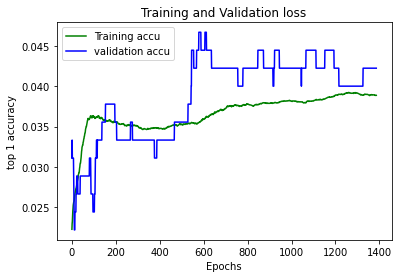

In [21]:
plt.plot(X, train_accu1, 'g', label='Training accu')
plt.plot(X, val_accu1, 'b', label='validation accu')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('top 1 accuracy')
plt.legend()
plt.savefig('top1 accuracy.png')
plt.show()

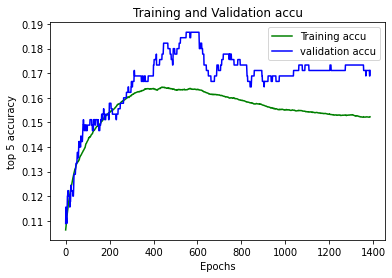

In [22]:
plt.plot(X, train_accu5, 'g', label='Training accu')
plt.plot(X, val_accu5, 'b', label='validation accu')
plt.title('Training and Validation accu')
plt.xlabel('Epochs')
plt.ylabel('top 5 accuracy')
plt.legend()
plt.savefig('top5 accuracy.png')
plt.show()

# try

In [ ]:
x = np.ones([4, 5])
np.matmul(np.ones(4), x)

array([4., 4., 4., 4., 4.])

In [ ]:
x = np.ones([5, 5])
y = np.array([1, 2, 3, 4, 5]).T
x.T * y, y * x

(array([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]]),
 array([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]]))

In [ ]:
y

array([1, 2, 3, 4, 5])

In [ ]:
class Perceptron:
    def __init__(self, n_inputs, activ_func='Sign', save_fig=False):
        self.weights = np.array([0.0] * (n_inputs + 1)) # 1 more for bias
        self.__save_fig = save_fig
        #self.__activation = ActivationFunction(activ_func)
        
    @property
    def weight(self):
        return self.weights[:]

In [ ]:
p = Perceptron(5)

In [ ]:
p.weight

array([0., 0., 0., 0., 0., 0.])

In [ ]:
x = np.random.rand(5, 5)
x

array([[0.4312073 , 0.79563335, 0.7903964 , 0.44791607, 0.97743261],
       [0.19974816, 0.47477725, 0.23096726, 0.31079405, 0.12462861],
       [0.65393639, 0.70778974, 0.82724055, 0.1705234 , 0.76576441],
       [0.1714608 , 0.6969142 , 0.53680819, 0.25848411, 0.22410697],
       [0.94678149, 0.24725074, 0.92050283, 0.18422513, 0.4689876 ]])

In [ ]:
x + np.ones([1, 5])

array([[1.4312073 , 1.79563335, 1.7903964 , 1.44791607, 1.97743261],
       [1.19974816, 1.47477725, 1.23096726, 1.31079405, 1.12462861],
       [1.65393639, 1.70778974, 1.82724055, 1.1705234 , 1.76576441],
       [1.1714608 , 1.6969142 , 1.53680819, 1.25848411, 1.22410697],
       [1.94678149, 1.24725074, 1.92050283, 1.18422513, 1.4689876 ]])

In [ ]:
np.ones([1, 5])

array([[1., 1., 1., 1., 1.]])

In [ ]:
np.argsort(np.random.rand(4, 5), axis=1)

array([[3, 4, 1, 2, 0],
       [1, 2, 4, 0, 3],
       [3, 0, 2, 4, 1],
       [4, 2, 1, 0, 3]], dtype=int64)

In [ ]:
5 in np.array([3, 5])

True

In [ ]:
x = np.random.rand(4, 5)
x

array([[0.6145373 , 0.97898866, 0.70528055, 0.25576186, 0.44729359],
       [0.35282704, 0.86313082, 0.05634414, 0.12630937, 0.61096443],
       [0.09034133, 0.58801322, 0.10469448, 0.07339031, 0.42117945],
       [0.35821314, 0.32672913, 0.57349844, 0.43201292, 0.31985492]])

In [ ]:
y = np.array([2, 3, 4, 5]).reshape([1, -1])
x / y.T

array([[0.30726865, 0.48949433, 0.35264028, 0.12788093, 0.22364679],
       [0.11760901, 0.28771027, 0.01878138, 0.04210312, 0.20365481],
       [0.02258533, 0.1470033 , 0.02617362, 0.01834758, 0.10529486],
       [0.07164263, 0.06534583, 0.11469969, 0.08640258, 0.06397098]])

In [ ]:
np.sum(x, axis=1)

array([1.95657326, 2.57029645, 1.92410748, 3.18509092])

In [ ]:
y

array([[2, 3, 4, 5]])